# Programación para Análisis de datos

## Análisis de datos exploratorio (EDA)

## Caso: Veterans' Administration Lung Cancer study

### Mtra. Gisel Hernández Chávez

Ensayo aleatorizado de dos regímenes de tratamiento para el cáncer de pulmón. Este es un conjunto de datos de análisis de supervivencia estándar.https://rdrr.io/cran/survival/man/veteran.html

__Sigificado de los campos__

__trt__:	1=standard 2=test  Dos tipos de tratamiento para el ensayo clínico / nominal

__celltype__:	1=squamous, 2=smallcell, 3=adeno, 4=large     / nominal

__time__:	survival time   (días de supervivencia)           / razón

__status__:	censoring status  / nominal

__karno__:	Karnofsky performance score (100=good)       / ordinal (algunos pueden considerarlo de intervalo)

    A standard way of measuring the ability of cancer patients to perform ordinary tasks. The Karnofsky Performance Status scores range from 0 to 100. A higher score means the patient is better able to carry out daily activities.

    "The scoring is subjectively assigned by a health professional based on the following hierarchical scale: 100=normal, no evidence of disease; 90=able to perform normal activity with only minor symptoms; 80=normal activity with effort, some symptoms; 70=able to care for self but unable to do normal activities; 60=requires occasional assistance, care for most needs; 50=requires considerable assistance; 40=disabled, requires special assistance; 30=severely disabled; 20=very sick, requires active supportive treatment; 10=moribund. Intermediate or even decimal scores can be assigned. The tool is named after David A. Karnofsky, who described the scale in 1949."(Ferrucci et.all,2007)

    <div class="csl-entry">Ferrucci, L., Koh, C., Bandinelli, S., &#38; Guralnik, J. M. (2007). Disability, Functional Status, and Activities of Daily Living. <i>Encyclopedia of Gerontology</i>, 427–436. https://doi.org/10.1016/B0-12-370870-2/00075-5</div>

__diagtime__:	months from diagnosis to randomisation   / razón

__age__:	in years                    /razón

__prior__:	prior therapy 0=no, 10=yes  / nominal

__Source__
D Kalbfleisch and RL Prentice (1980), The Statistical Analysis of Failure Time Data. Wiley, New York.

## Preguntas de investigación

1. ¿Qué grupo de tratamiento tiene mayor tasa de supervivencia después de 1 año (365 días)?
2. ¿Cuál es el estimado de supervivencia de los veteranos, independientemente del tratamiento, a través de los primeros 200 días?
3. ¿Puedo predecir con más de 0.65 de concordancia la probabilidad y el riesgo de supervivencia de un veterano conociendo 'trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age' y 'prior'?

### Unidad de observación

+ Cada fila de la tabla: veterano con cáncer de pulmón ...

### Unidad de análisis

| __Pregunta de investigación__ | __Unidad de análisis__ |
| --------------------------------------------------- | ------------------ | 
| Qué trt tiene mayor superv. después 1 año?                              | grupo tratamiento |  
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia en 200 días | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Modelo supervivencia de veterano concordancia >0.65 | veterano           | 


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import lifelines

In [4]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# This class implements an Exponential model for univariate data
from lifelines import ExponentialFitter

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [8]:
# import pandas_profiling
# from pandas_profiling import ProfileReport


In [9]:
df = pd.read_csv('dataset-25346.csv',encoding='utf-8')
# 'latin-1'

In [11]:
# Copia profunda
df_backup = df.copy()

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
df

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
132,2,large,133,1,75,1,65,0
133,2,large,111,1,60,5,64,0
134,2,large,231,1,70,18,67,10
135,2,large,378,1,80,4,65,0


In [28]:
squamous = df.loc[(df.celltype == 'squamous') & (df.karno<=60)]
squamous

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
5,1,squamous,10,1,20,5,49,0
6,1,squamous,82,1,40,10,69,10
8,1,squamous,314,1,50,18,43,0
10,1,squamous,42,1,60,4,81,0
11,1,squamous,8,1,40,58,63,10
12,1,squamous,144,1,30,4,63,0
72,2,squamous,231,0,50,8,52,10


In [15]:
# Lista de nombres de columnas
col = df.columns
col


Index(['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trt       137 non-null    int64 
 1   celltype  137 non-null    object
 2   time      137 non-null    int64 
 3   status    137 non-null    int64 
 4   karno     137 non-null    int64 
 5   diagtime  137 non-null    int64 
 6   age       137 non-null    int64 
 7   prior     137 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [17]:
nominales = ['trt', 'celltype', 'status','prior']
ordinales = ['karno']  # Pudiera considerarse de intervalo siendo flexibles y no ortodoxos
#intervalo
razon = ['time', 'diagtime', 'age']

In [18]:
#df['trt_cat'] = df['trt'].astype('category')
#df.info()

In [19]:
for i in nominales:
    df[i] = df[i].astype('category')
    

In [20]:
#df.celltype = df.celltype.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   trt       137 non-null    category
 1   celltype  137 non-null    category
 2   time      137 non-null    int64   
 3   status    137 non-null    category
 4   karno     137 non-null    int64   
 5   diagtime  137 non-null    int64   
 6   age       137 non-null    int64   
 7   prior     137 non-null    category
dtypes: category(4), int64(4)
memory usage: 5.5 KB


## Análisis univariado visual y no visual

Para lo visual puede usar como guía las siguientes imágenes

<div>
<img src="attachment:image-2.png" width="500"/>
</div>

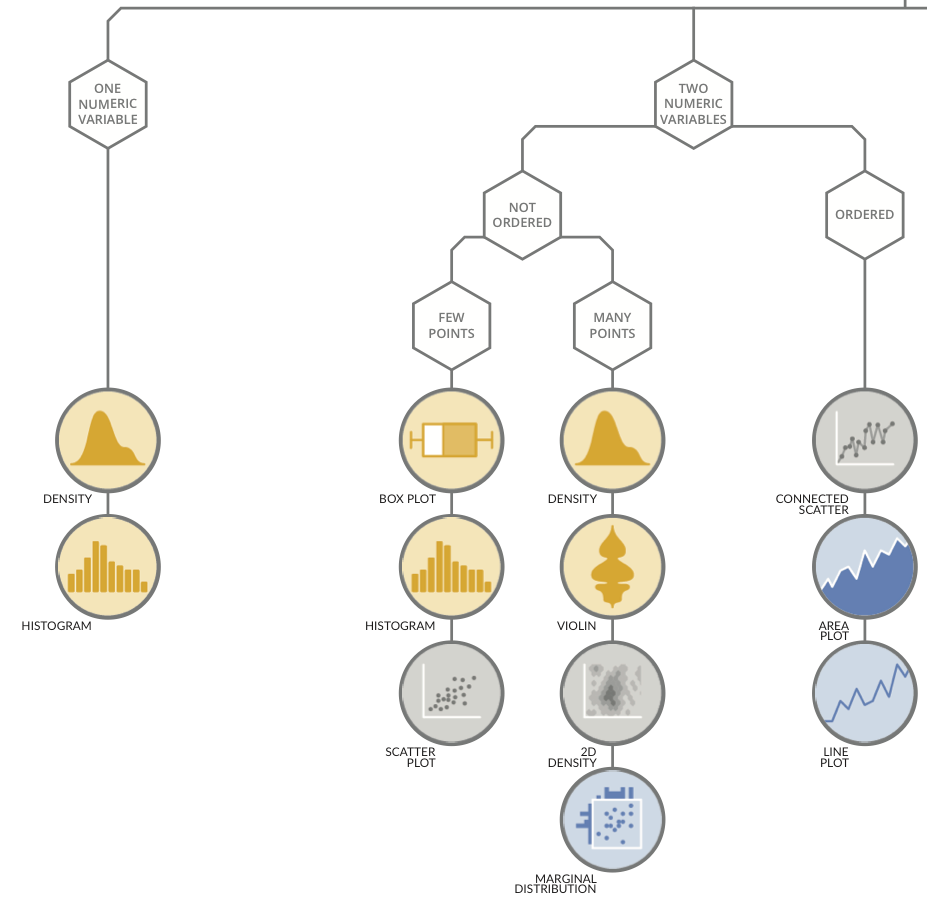

In [20]:
from IPython import display
display.Image(r'C:\Users\ghernand\Documents\ProgramacionAnaliticaDatos\grafica_por_tipo_escala_estadistica.png',width = 600, height = 300)


### Explorar si las categóricas son de alta o baja cardinalidad

In [21]:

for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()
    

trt


[1, 2]
Categories (2, int64): [1, 2]


celltype


['squamous', 'smallcell', 'adeno', 'large']
Categories (4, object): ['adeno', 'large', 'smallcell', 'squamous']


status


[1, 0]
Categories (2, int64): [0, 1]


prior


[0, 10]
Categories (2, int64): [0, 10]


karno


array([60, 70, 20, 40, 80, 50, 30, 75, 90, 85, 99, 10], dtype=int64)

### Hallazgo

+ Todas las nominales pueden ser consideradas de baja cardinalidad
+ karno, que es ordinal, es de alta cardinalidad

In [29]:
# Frecuencia de categórica o discreta
df.celltype.value_counts()

smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64

In [89]:
prop_cel = df.celltype.value_counts(normalize=True)
prop_cel

smallcell    0.350365
squamous     0.255474
adeno        0.197080
large        0.197080
Name: celltype, dtype: float64

In [30]:
prop_cel = (df.celltype.value_counts(normalize=True) *100).round(2)
prop_cel

smallcell    35.04
squamous     25.55
adeno        19.71
large        19.71
Name: celltype, dtype: float64

### Gráfica de pie y de dona

+ Para baja cardinalidad; normalmente 6 o menos categorias y datos expresados en proporciones o porcentajes

Text(0.5, 1.0, 'Porcentaje de tipos de células de cáncer de pulmón en la muestra')

([<matplotlib.patches.Wedge at 0x1b26a6ca940>,
 [Text(0.49826549499298955, 0.9806790996546176, 'smallcell'),
  Text(-1.0896046511478596, 0.15086982533612026, 'squamous'),
  Text(-0.31100588849405886, -1.0551186366101308, 'adeno'),
  Text(0.8958116976031194, -0.638374030202841, 'large')],
 [Text(0.27178117908708516, 0.5349158725388823, '35.0%'),
  Text(-0.5943298097170142, 0.08229263200152012, '25.5%'),
  Text(-0.1696395755422139, -0.5755192563327985, '19.7%'),
  Text(0.4886245623289741, -0.34820401647427685, '19.7%')])

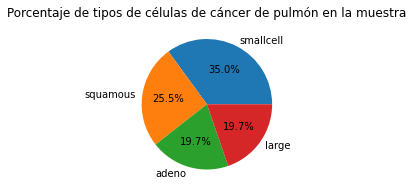

In [38]:
# Se hace esto
fig, ax = plt.subplots(figsize=(4,3))

# palette_color = sns.color_palette('bright')
plt.title('Porcentaje de tipos de células de cáncer de pulmón en la muestra')  
# Método de plt
plt.pie(prop_cel, labels=prop_cel.index, autopct='%.1f%%')
#plt.pie(prop_cel, labels=prop_cel.index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

([<matplotlib.patches.Wedge at 0x1b26a9c7d60>,
 [Text(0.49826549499298955, 0.9806790996546176, 'smallcell'),
  Text(-1.0896046511478596, 0.15086982533612026, 'squamous'),
  Text(-0.31100588849405886, -1.0551186366101308, 'adeno'),
  Text(0.8958116976031194, -0.638374030202841, 'large')],
 [Text(0.33972647385885646, 0.6686448406736029, '35.0%'),
  Text(-0.7429122621462678, 0.10286579000190016, '25.5%'),
  Text(-0.2120494694277674, -0.7193990704159982, '19.7%'),
  Text(0.6107807029112177, -0.43525502059284604, '19.7%')])

Text(0.5, 1.0, 'Porcentaje de tipos de células cancerígenas en la muestra')

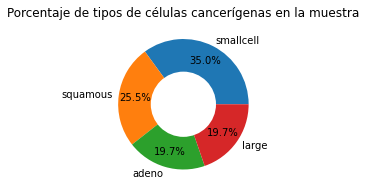

In [45]:
plt.pie(prop_cel, labels=prop_cel.index,
        autopct='%1.1f%%', pctdistance=0.75,
        )
  
# Dibuja círculo
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf() # Devuelve cuál es el figure actual
# fig.set_figwidth(2) # Configuras el ancho
# fig.set_figheight(4)
fig.set_size_inches(3,3)

  
# Adiciona círculo al pie
fig.gca().add_artist(centre_circle)
  
plt.title('Porcentaje de tipos de células cancerígenas en la muestra')
  
plt.show()

### Hallazgos
+ No hay desbalance severo entre las muestras de cada tipo de célula
+ La mayoría de los veteranos tiene cáncer de pulmón de célula pequeña

### Histograma

+ Un histograma es una herramienta de visualización clásica que representa la distribución de una o más variables al contar el número de observaciones que se encuentran dentro de contenedores discretos (bins).

+ La función histplot() de seaborn puede normalizar la estadística calculada dentro de cada contenedor para estimar la frecuencia, la densidad o la masa de probabilidad, y puede agregar una curva suave obtenida mediante una estimación de la densidad del kernel, similar a kdeplot().

+ seaborn.histplot() calcula la cantidad de contenedores (bin)s. La elección de los contenedores para calcular y trazar un histograma puede ejercer una influencia sustancial en los conocimientos que uno puede extraer de la visualización. Si los contenedores son demasiado grandes, pueden borrar funciones importantes. Por otro lado, los contenedores que son demasiado pequeños pueden estar dominados por la variabilidad aleatoria, lo que oscurece la forma de la verdadera distribución subyacente. El tamaño del contenedor predeterminado se determina mediante una regla de referencia que depende del tamaño y la varianza de la muestra. Esto funciona bien en muchos casos (es decir, con datos de "buen comportamiento") pero falla en otros. Siempre es bueno probar diferentes tamaños de contenedores para asegurarse de que no se está perdiendo algo importante. Esta función le permite especificar contenedores de varias maneras diferentes, como establecer el número total de contenedores que se usarán, el ancho de cada contenedor o las ubicaciones específicas donde los contenedores deben dividirse.

<AxesSubplot:>

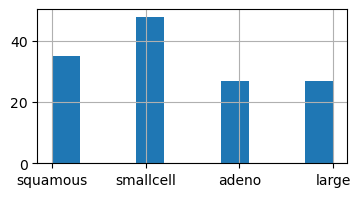

In [24]:
fig,ax = plt.subplots(figsize=(4,2))
# hist() es método de pandas
# En el eje y aquí muestra frecuencia
df.celltype.hist()  # 10 bins por defecto 

<AxesSubplot:xlabel='karno', ylabel='Count'>

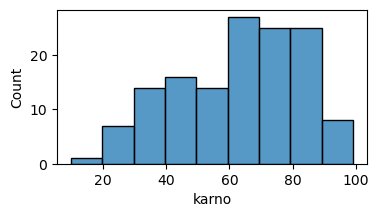

In [25]:
fig,ax = plt.subplots(figsize=(4,2))
sns.histplot(data=df,x='karno')
# seaborn determina que 9 bins es lo mejor

<AxesSubplot:xlabel='karno', ylabel='Count'>

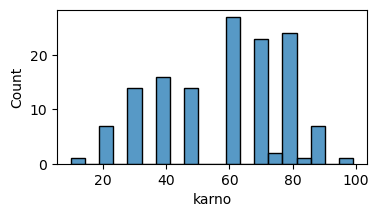

In [26]:
fig,ax = plt.subplots(figsize=(4,2))
sns.histplot(data=df,x='karno', bins=20)

<AxesSubplot:xlabel='time', ylabel='Count'>

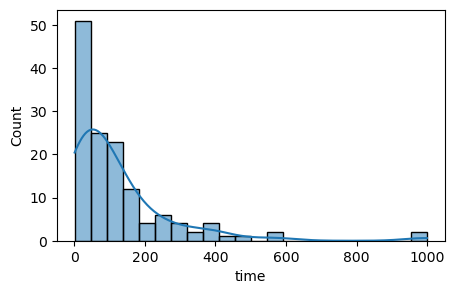

In [27]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="time", kde=True)

### Interpretación

+ Ni time ni karno siguen una distribución normal
+ Mayoría muere antes de los 200 días
+ Mayor frecuencia de muertes está antes de los 50 días

### Uso de escala logarítmica

<AxesSubplot:xlabel='time', ylabel='Count'>

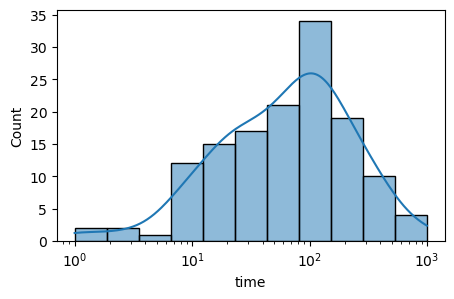

In [28]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="time", kde=True,log_scale=True) # por defecto es logaritmo en base 10

In [118]:
# np.log es en base e, o logaritmo natural/nederiano
df['log_time'] = np.log10(df['time'])
df['log_time']

0      1.857332
1      2.613842
2      2.357935
3      2.100371
4      2.071882
         ...   
132    2.123852
133    2.045323
134    2.363612
135    2.577492
136    1.690196
Name: log_time, Length: 137, dtype: float64

### Interpretación

+ Esta nueva variable (nueva característica) tiene una distribución más cercana a la normal y pudiera ser considerada como nuevo "feature"
+ 

In [29]:
for i in nominales + ordinales:
    print(i)
    df[i].describe()
    print()

trt


count     137
unique      2
top         1
freq       69
Name: trt, dtype: int64


celltype


count           137
unique            4
top       smallcell
freq             48
Name: celltype, dtype: object


status


count     137
unique      2
top         1
freq      128
Name: status, dtype: int64


prior


count     137
unique      2
top         0
freq       97
Name: prior, dtype: int64


karno


count    137.000000
mean      58.569343
std       20.039592
min       10.000000
25%       40.000000
50%       60.000000
75%       75.000000
max       99.000000
Name: karno, dtype: float64

<AxesSubplot:xlabel='karno'>

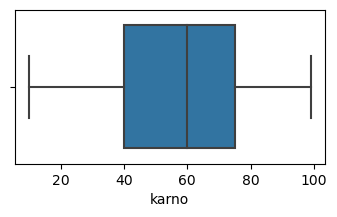

In [30]:
#df.karno.plot.box()
fig,ax = plt.subplots(figsize=(4,2))
sns.boxplot(x=df.karno,ax=ax)

## Exploración de cantidad de muestras por categoría

+ Sirve, entre otras cosas, para detectar desbalance y muestras muy pequeñas

In [31]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts()
    print()

trt


1    69
2    68
Name: trt, dtype: int64


celltype


smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64


status


1    128
0      9
Name: status, dtype: int64


prior


0     97
10    40
Name: prior, dtype: int64


karno


60    27
80    24
70    23
40    16
50    14
30    14
20     7
90     7
75     2
85     1
99     1
10     1
Name: karno, dtype: int64

In [32]:
df.karno.mode()

0    60
Name: karno, dtype: int64

In [33]:
plt.subplots?

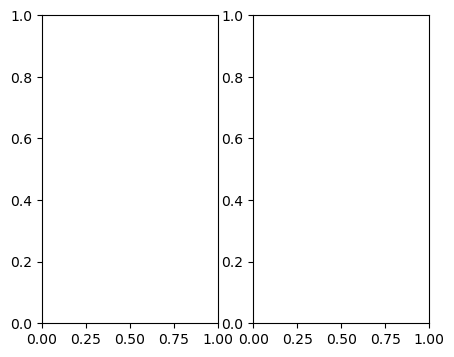

In [34]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(5,4))

## Conversión a dummy

In [35]:
pd.get_dummies?

In [36]:
df_dum = pd.get_dummies(df,drop_first=True)
df_dum

,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10
0,72,60,7,69,0,0,0,1,1,0
1,411,70,5,64,0,0,0,1,1,1
2,228,60,3,38,0,0,0,1,1,0
3,126,60,9,63,0,0,0,1,1,1
4,118,70,11,65,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
132,133,75,1,65,1,1,0,0,1,0
133,111,60,5,64,1,1,0,0,1,0
134,231,70,18,67,1,1,0,0,1,1
135,378,80,4,65,1,1,0,0,1,0


In [37]:
pd.get_dummies(df[['trt','prior']],drop_first=True)

,trt_2,prior_10
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,1
135,1,0


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
type(df.iloc[1])

pandas.core.series.Series

In [40]:
df_1 = df[df.trt ==1]
df_1

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
64,1,large,143,1,90,8,60,0
65,1,large,105,1,80,11,66,0
66,1,large,103,1,80,5,38,0
67,1,large,250,1,70,8,53,10


In [41]:
df1_cen = df_1[df_1['status']==0]
df1_cen

,trt,celltype,time,status,karno,diagtime,age,prior
9,1,squamous,100,0,70,6,70,0
13,1,squamous,25,0,80,9,52,10
20,1,smallcell,123,0,40,3,55,0
21,1,smallcell,97,0,60,5,67,0
63,1,large,182,0,90,2,62,0


In [42]:
f'Cantidad de observaciones censuradas para el tratamiento 1: {len(df1_cen)}'

'Cantidad de observaciones censuradas para el tratamiento 1: 5'

## Gráficos de barra, de cajas, de punto, de violín

Un __gráfico de barras__ representa una estimación de la tendencia central de una variable numérica con la altura de cada rectángulo y __proporciona alguna indicación de la incertidumbre en torno a esa estimación__ utilizando barras de error. Los diagramas de barras incluyen 0 en el rango del eje cuantitativo y son una buena opción cuando 0 es un valor significativo para la variable cuantitativa y desea realizar comparaciones con ella.

__Para conjuntos de datos en los que 0 no es un valor significativo__, un __gráfico de puntos__ le permitirá centrarse en las __diferencias entre los niveles de una o más variables categóricas__.

También es importante tener en cuenta que un diagrama de barras muestra solo el valor medio (u otro estimador), pero en muchos casos __puede ser más informativo mostrar la distribución de valores en cada nivel de las variables categóricas__. En ese caso, otros enfoques, como un __diagrama de caja o de violín__, pueden ser más apropiados.

<Figure size 400x300 with 0 Axes>

<AxesSubplot:ylabel='karno'>

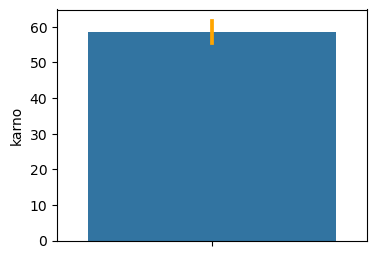

In [43]:
plt.figure(figsize=(4,3))
sns.barplot(data=df, y="karno",errcolor='orange')
# Aquí el intervalo de confianza es del 95% (ci), calculado con 1000 bootstarps

<Figure size 400x300 with 0 Axes>

<AxesSubplot:xlabel='karno'>

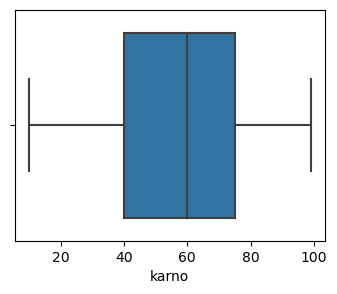

In [44]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x="karno")

<Figure size 400x300 with 0 Axes>

<AxesSubplot:xlabel='celltype', ylabel='karno'>

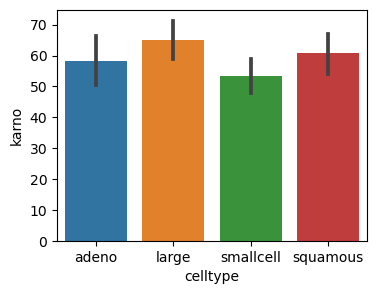

In [45]:
plt.figure(figsize=(4,3))
sns.barplot(data=df, x="celltype", y="karno")

### Interpretación


### Diagrama de puntos

Un gráfico de puntos representa una estimación de la tendencia central de una variable numérica por la posición del punto y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

Los gráficos de puntos pueden ser más útiles que los gráficos de barras para centrar las comparaciones entre diferentes niveles de una o más variables categóricas. Son particularmente hábiles para mostrar interacciones: cómo cambia la relación entre los niveles de una variable categórica a través de los niveles de una segunda variable categórica. Las líneas que unen cada punto del mismo nivel de tonalidad permiten juzgar las interacciones por diferencias de pendiente, lo que es más fácil para los ojos que comparar las alturas de varios grupos de puntos o barras.


<AxesSubplot:xlabel='celltype', ylabel='karno'>

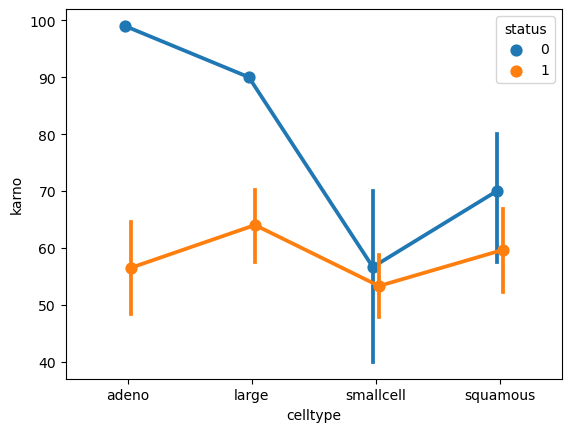

In [46]:
sns.pointplot(data=df, x="celltype", y="karno",hue='status',dodge=True) # dodge evita la superposición al graficar

### Interpretación

+


### Diagrama de violín

Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse.__A diferencia de un diagrama de caja__, en el que todos los componentes del diagrama corresponden a puntos de datos reales, el diagrama de violín __presenta una estimación de la densidad del núcleo de la distribución subyacente__.

Esta puede ser una forma eficaz y atractiva de mostrar múltiples distribuciones de datos a la vez, pero tenga en cuenta que el procedimiento de estimación está influenciado por el tamaño de la muestra, y los violines para muestras relativamente pequeñas pueden parecer engañosamente fluidos.

<Figure size 400x300 with 0 Axes>

<AxesSubplot:xlabel='karno'>

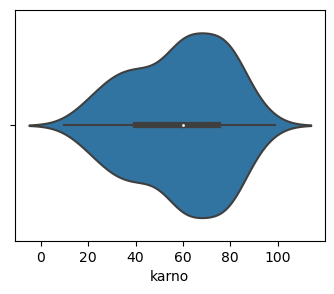

In [47]:
plt.figure(figsize=(4,3))
sns.violinplot(x=df["karno"])

### Interpretación


<Figure size 500x400 with 0 Axes>

<AxesSubplot:xlabel='celltype', ylabel='karno'>

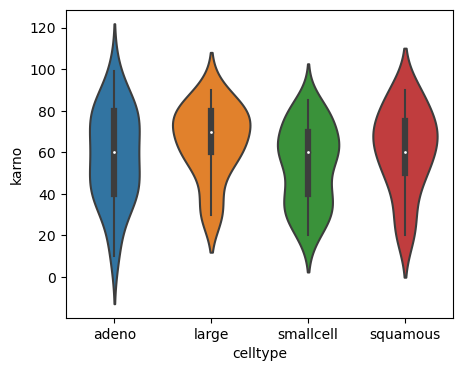

In [48]:
plt.figure(figsize=(5,4))
sns.violinplot(x=df["celltype"],y=df["karno"])

### Interpretación


Hay una mayor densidad de veteranos con células grandes que tienen una edad un poco mayor a la mediana (karno 70)

<Figure size 500x400 with 0 Axes>

<AxesSubplot:xlabel='celltype', ylabel='karno'>

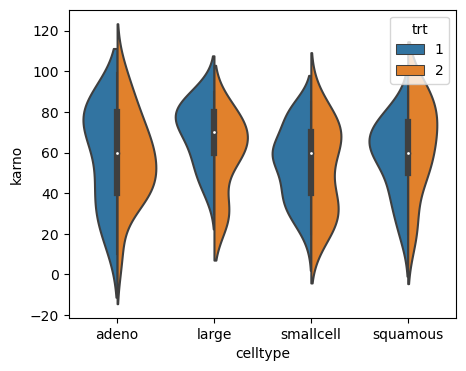

In [49]:
plt.figure(figsize=(5,4))
sns.violinplot(x=df["celltype"],y=df["karno"],hue=df["trt"], split=True)


### Interpretación


En adeno, los de tratamiento 2 tenen una distribución normal en su karno, mientras que el 1 no.  
No se puede decir que tienen una mejor calidad de vida, pues se demuestra la densidad.


<AxesSubplot:xlabel='karno', ylabel='trt'>

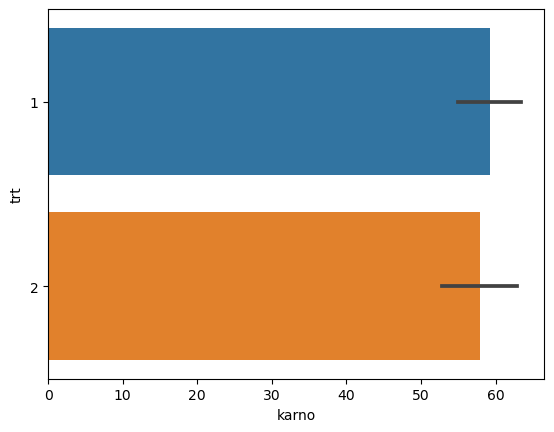

In [50]:
sns.barplot(data=df, x="karno", y="trt")

Hipótesis Posibles
<hr>
  
* H0: TR1 produce mejor calidad de vida que el TR2  [karno1>karno2]  
  Ha: TR2 produce mejor calidad de vida que el TR1  [karno1<=karno2]
  
* H0: Los grupos de TR1 y TR2 son iguales en cuanto a su karno (no hay diferencias significativas)  
  Ha: No son iguales


### Interpretación


<AxesSubplot:xlabel='celltype', ylabel='Count'>

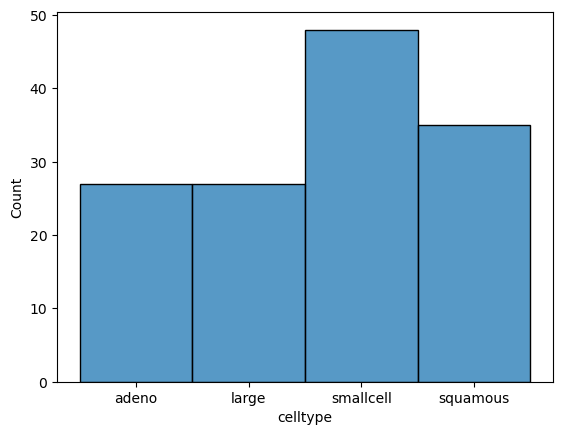

In [51]:
sns.histplot(data=df,x=df.celltype)
# Se debe usar diagrama de barra para este caso porque la variable es categórica de baja cardinalidad

### Interpretación


(array([35.,  0.,  0., 48.,  0.,  0., 27.,  0.,  0., 27.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

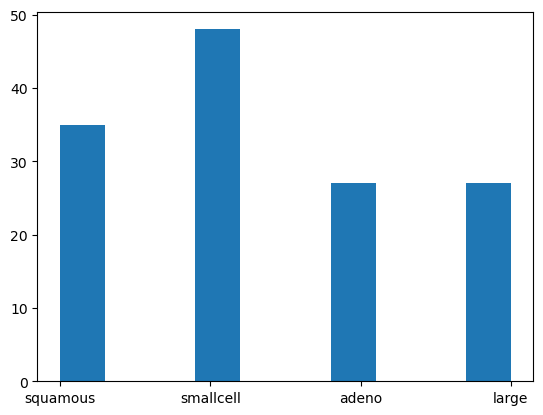

In [52]:
plt.hist(df.celltype)

In [1]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(6,4),sharey=True)
# Cuidar la forma en la que se envía un gráfico a un eje en dependencia de la biblioteca y el método, es muy variable
axs[0].hist(df.celltype)
axs[1] = sns.histplot(data=df,x=df.celltype)
plt.suptitle('Histogramas')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

### Interpretación


### Diagramas categóricos

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

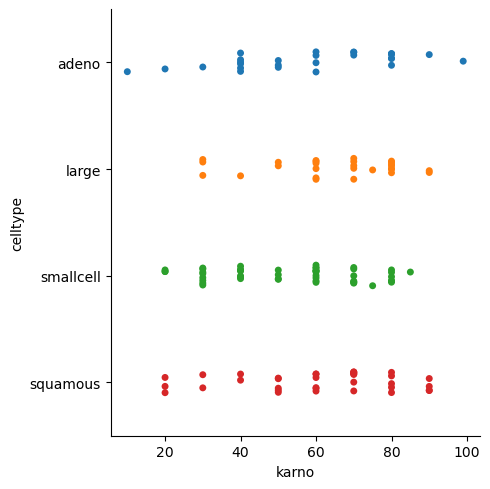

In [54]:
plt.figure(figsize=(4,4))
sns.catplot(data=df, x="karno", y="celltype")

### Interpretación


Este es un diagrama de dispersión (scatter), si no quieres este, puedes especificaren catplot.  
* El karno de cada uno de los tipos de célula sigue diferentes patrones
* Hay mayor dispersión en adeno, puesto que hay un valor muy bajo y uno muy grande
* Gat una menor dispersión en large, donde tiende a un karno mayor

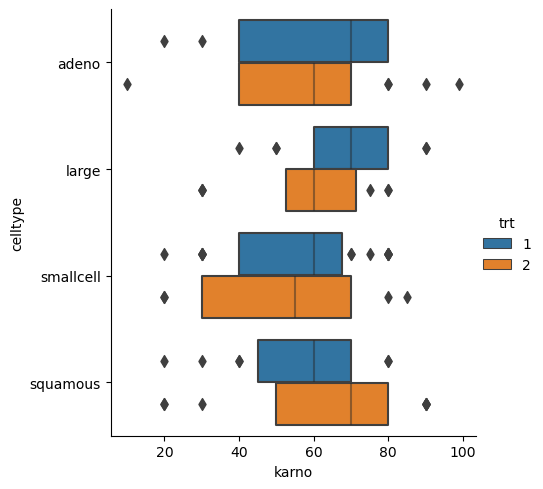

In [55]:
sns.catplot(data=df, x="karno", y="celltype", hue="trt", kind="boxen")

### Interpretación  
A comparación este da mas información que el anteror por la división en tratamientos. Da un box plot de 2do y 3er cuartil.  
Los puntos son datos outliers. Se debe hacer un tratamiento de outliers.

+ 


<AxesSubplot:xlabel='karno', ylabel='celltype'>

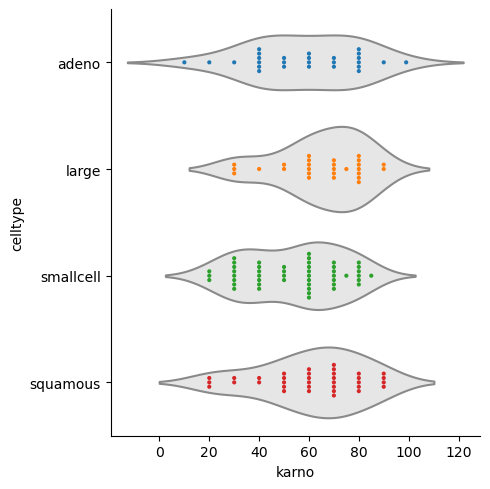

In [56]:
sns.catplot(data=df, x="karno", y="celltype", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="karno", y="celltype", size=3)

### Interpretación

+


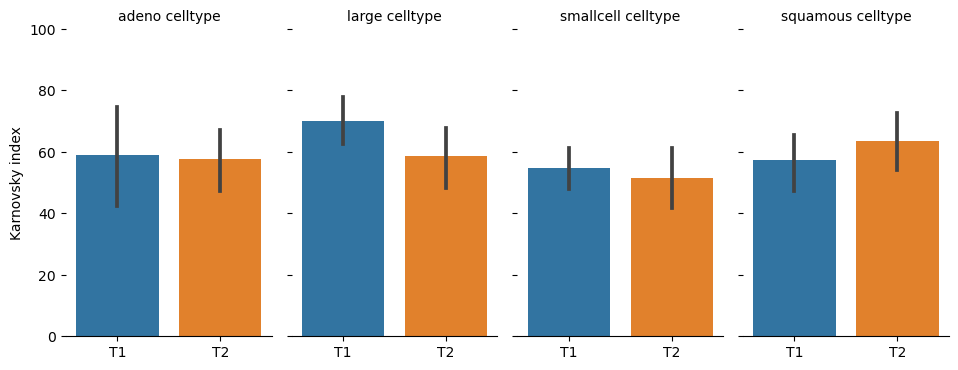

In [57]:
g = sns.catplot(
    data=df, x="trt", y="karno", col="celltype",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Karnovsky index")
g.set_xticklabels(["T1", "T2"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 100))
g.despine(left=True)

### Interpretación

+


In [58]:
pandas_profiling.version.__version__

'2.9.0'

In [59]:
profile = ProfileReport(df, title="Reporte de veteranos")

In [60]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
profile.to_file(output_file='veteranos_EDA.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análisis bivariado

+ Usar jointplot de seaborn para gráficas bivariadas con distribuciones marginales univariadas

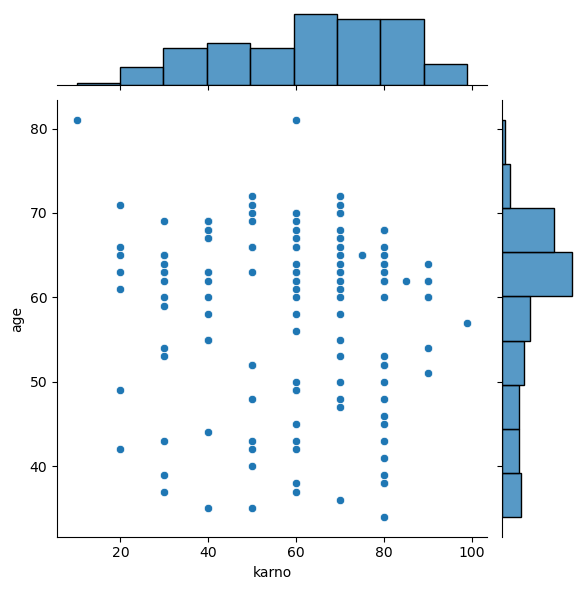

In [62]:
sns.jointplot(data=df, x="karno", y="age")

### Interpretación
+ 

In [63]:
df.columns

Index(['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior'],
      dtype='object')

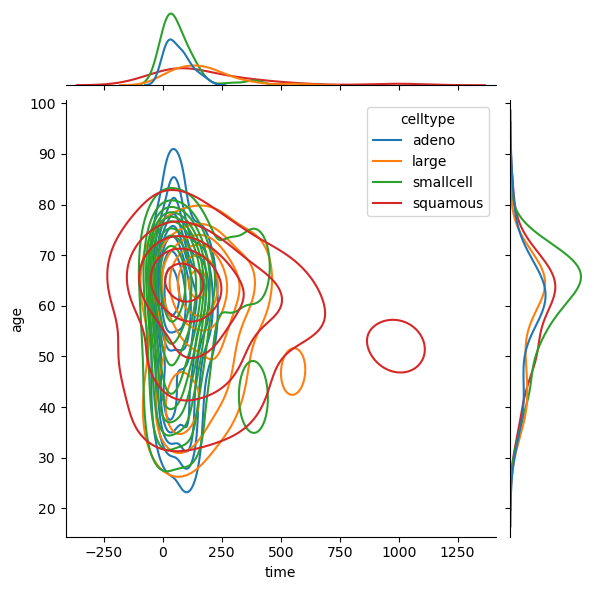

In [64]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")


### Interpretación
+ 

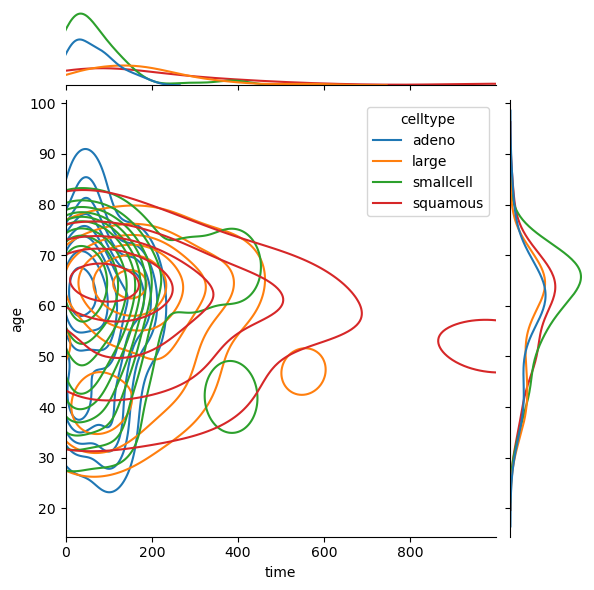

In [65]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",xlim=(0,df.time.max()),kind="kde")


### Interpretación

+

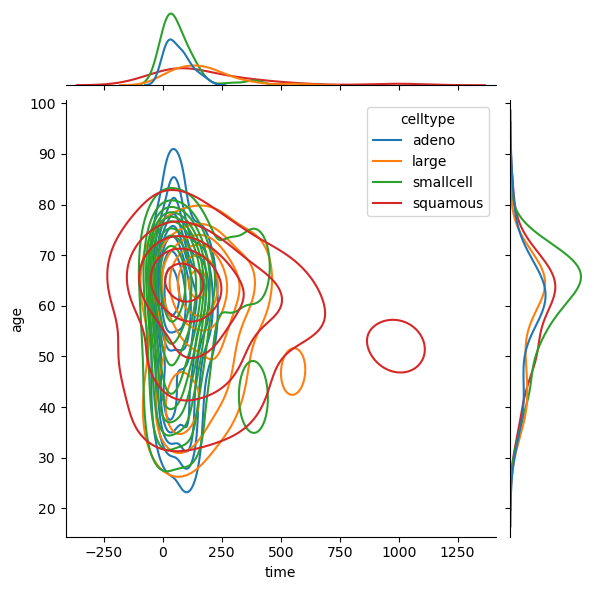

In [66]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")


### Interpretación

+

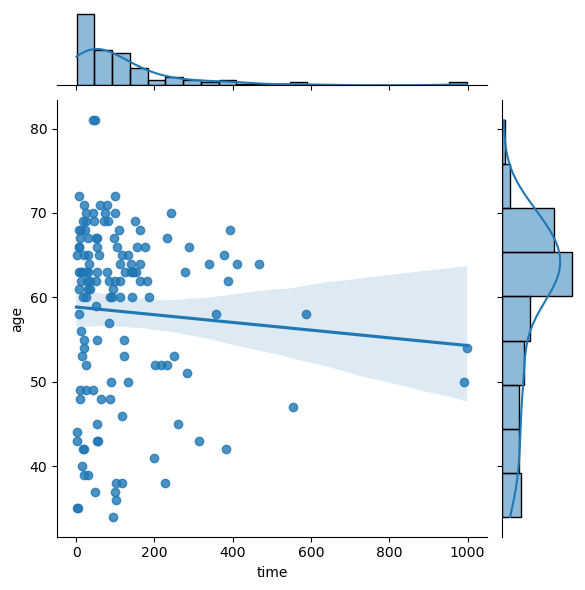

In [67]:
sns.jointplot(data=df, x="time", y="age",kind="reg")

### Interpretación

+

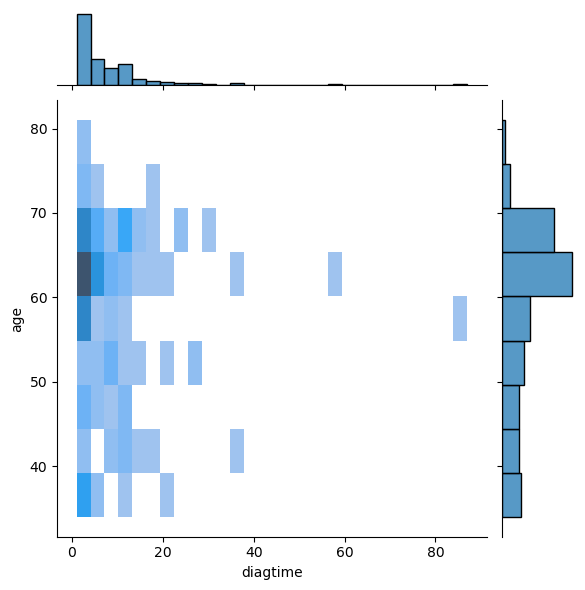

In [68]:
sns.jointplot(data=df, x="diagtime", y="age",kind="hist")

### Interpretación

+

C:\Users\ghernand\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


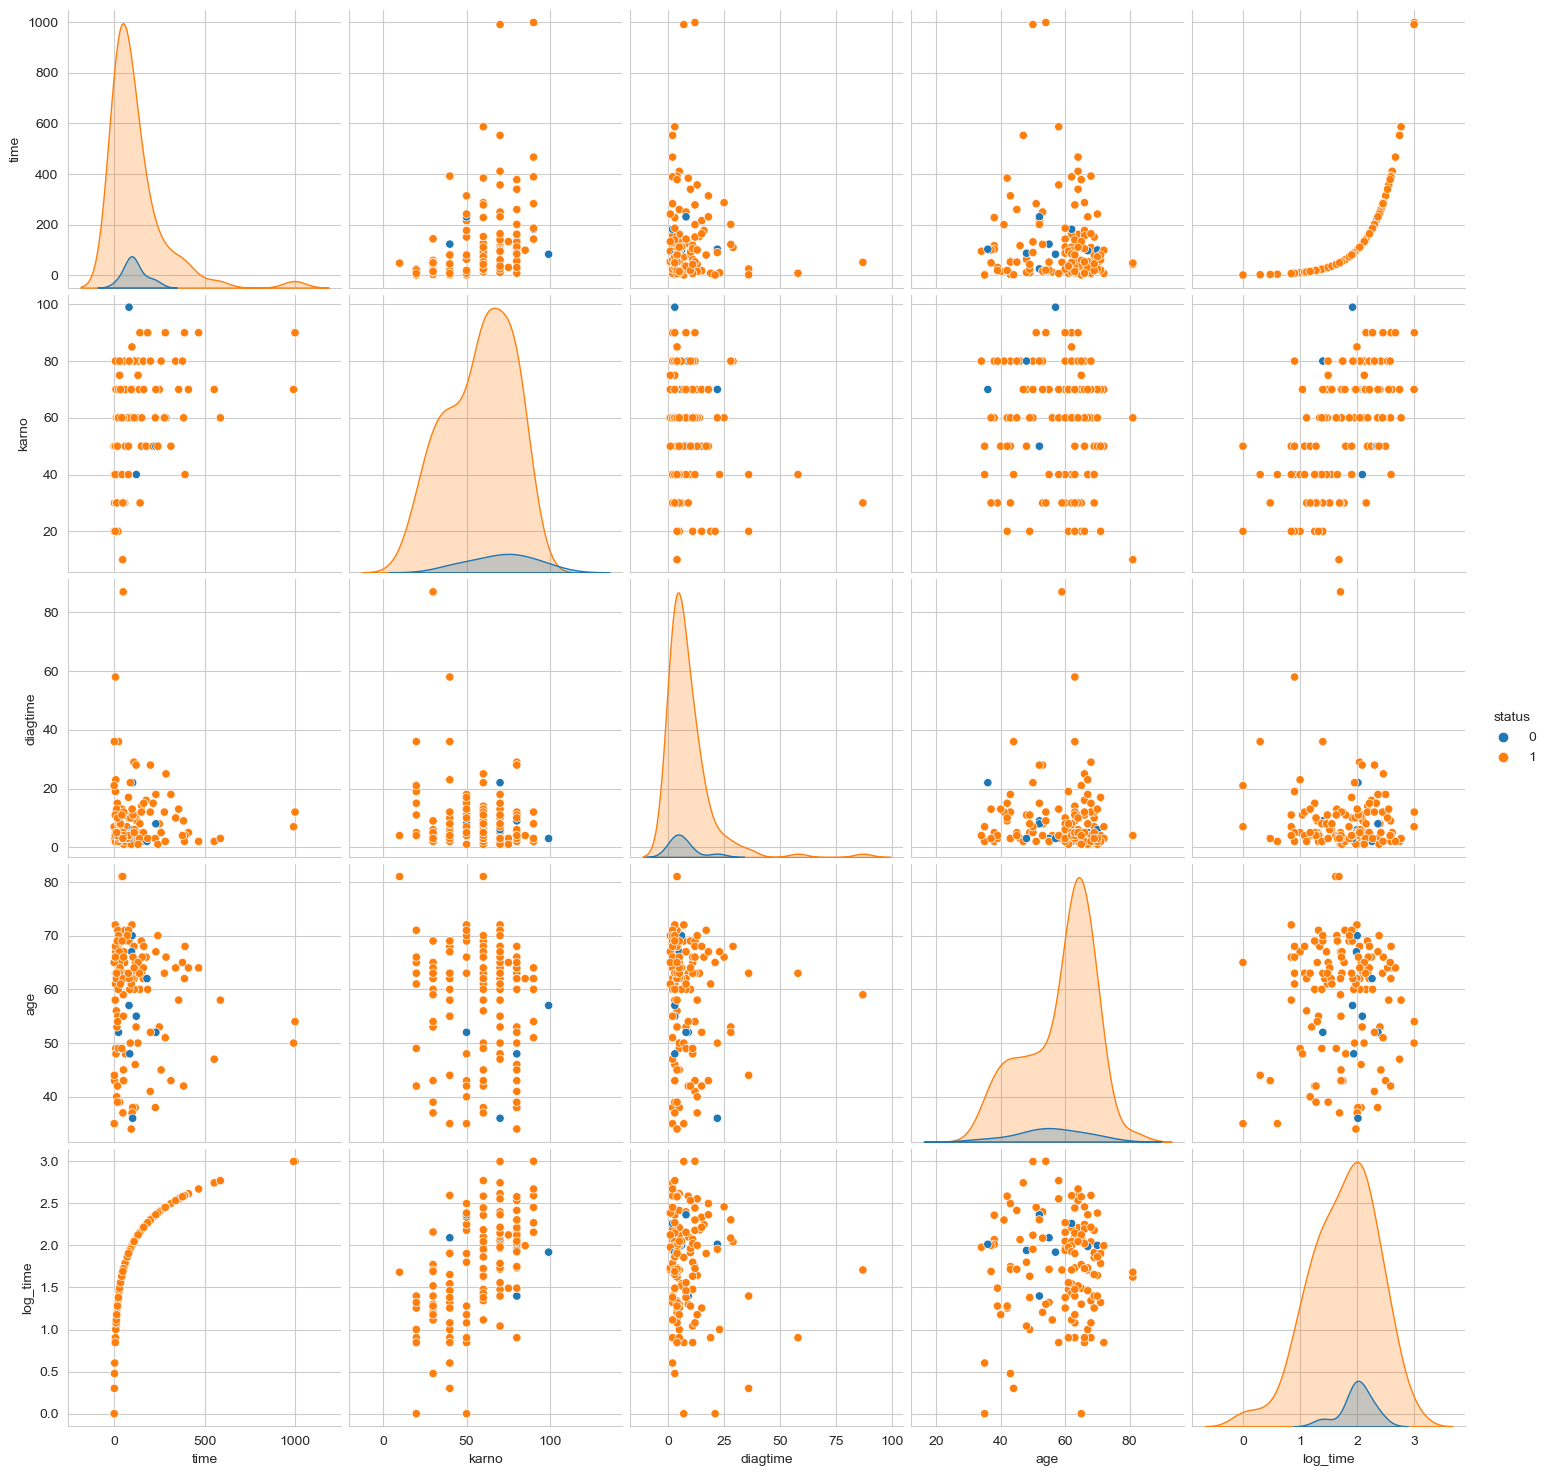

In [125]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data=df, hue='status', size=3)
plt.show()

In [119]:
df.columns

Index(['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior', 'log_time'],
      dtype='object')

## Modelo paramétrico univariado exponencial

__Función de probabilidad de supervivencia acumulada__

$S(t) = \exp\left(\frac{-t}{\lambda}\right),   \lambda >0$

__Función de riesgo acumulado (Tasa de riesgo acumulado)__


$H(t) = \frac{t}{\lambda}$

__Tasa de Riesgo (hazard)__

$h(t) = \frac{1}{\lambda}$


In [69]:
#ExponentialFitter.fit?

In [70]:
df_1[df_1['time'] <= 0]

,trt,celltype,time,status,karno,diagtime,age,prior


In [71]:
epf = ExponentialFitter().fit(df_1['time'],df_1['status'] )

In [72]:
epf

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 69 total observations, 5 right-censored observations>

In [73]:
epf.print_summary()

C:\Users\ghernand\Anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 69 total observations, 5 right-censored observations>
   number of observations = 69
number of events observed = 64
           log-likelihood = -372.57
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 124.14      15.52            93.73           154.55

          cmp to    z      p   -log2(p)
lambda_     0.00 8.00 <0.005      49.51
---
AIC = 747.14

In [74]:
import math
math.exp(124.14)

8.190623884321833e+53

In [75]:
1/124.14  # el riesgo es el inverso de lambda

0.008055421298533913

In [76]:
15.52*3.92/2


30.4192

In [77]:
epf.hazard_

,Exponential_estimate
3.000000,0.008055
11.088235,0.008055
19.176471,0.008055
27.264706,0.008055
35.352941,0.008055
...,...
520.647059,0.008055
528.735294,0.008055
536.823529,0.008055
544.911765,0.008055


## Interpretación del resumen del modelo

+ El coeficiente lambda es 124.14, por lo que el riesgo es igual a 0.008 y constante en el tiempo.

+ El error estándar de 15.52 (__se__ del inglés standard error) para el coeficiente, estima la variabilidad entre los estimados de coeficientes que se obtendrían si se tomaran muestras de la población una y otra vez. Es una estimación de la desviación estándar del coeficiente. Sirve para valorar la precisión del modelo, comparando con la magnitud del coeficiente.

+ El intervalo de confianza para un 95% está entre 93.73 y 154.55. Se calcula a partir del coeficiente y el error estándar. Si se dispone de un intervalo de confianza del 95 % para una medida absoluta del efecto de la intervención, el error estándar puede calcularse como

    se = (límite superior – límite inferior) / 3.92  # 3.92 es para un 95% de confianza
    (se * 3.92) /2 = (ls -li)/2 que es lo que hay que sumar y restar al coeficiente para obtener el intervalo de confianza 

Es una estimación de la desviación estándar del coeficiente

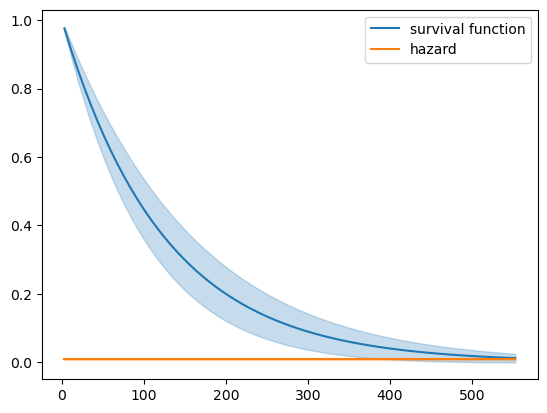

In [78]:
epf.plot_survival_function(label='survival function').legend()
epf.plot_hazard(label='hazard').legend()

### Función de masa y función de densidad

### pdf (probability density function)

### cdf (cumulative distribution function)

<AxesSubplot:>

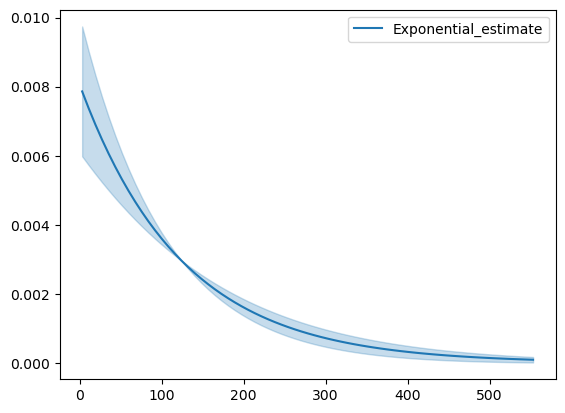

In [79]:
epf.plot_density()

<AxesSubplot:>

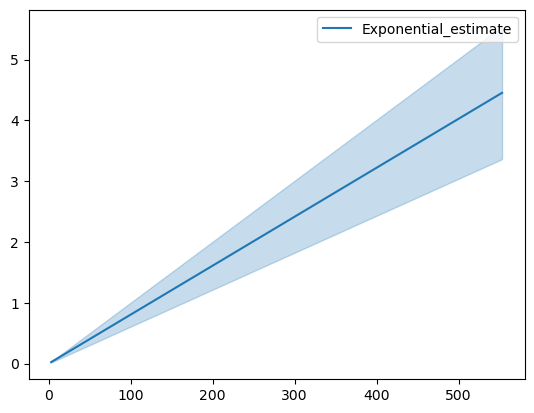

In [80]:
epf.plot_cumulative_hazard()

<AxesSubplot:>

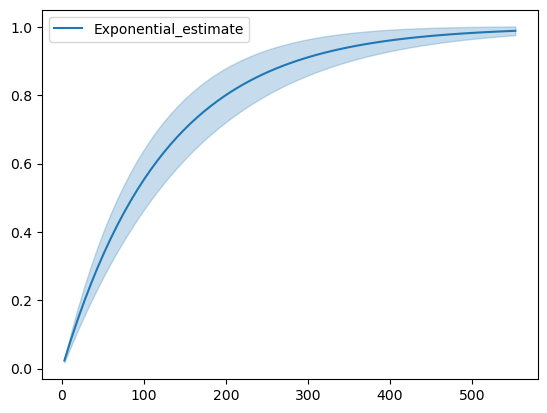

In [81]:
epf.plot_cumulative_density()

In [82]:
epf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,69,69
3.0,1,1,0,0,69
4.0,1,1,0,0,68
7.0,1,1,0,0,67
8.0,2,2,0,0,66
...,...,...,...,...,...
314.0,1,1,0,0,5
384.0,1,1,0,0,4
392.0,1,1,0,0,3


In [83]:
#from sklearn